# Statistical Computer Vision - Face recognition
Our goal is to recognize unseen faces by performing Principal Component Analysis.

We will explore and compare eigenfaces to probabilistic face recognition, based
on face images from a subset of the publicly available Color FERET Database. We find eigen representation φ(x) for each training image x i.e project the
image x on the first Np Eigenfaces and find corresponding Np coefficients and build total 52 Gaussian density functions for the likelihood, one for each
subject in the training set.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


## loading data and pre-processing

In [ ]:
import os

data=[]
label=[]
for root, dirs, files in os.walk("./Color FERET Database/", topdown=True):

    for name in files:
        file=os.path.join(root, name)
        #print(file)
        #print(os.path.basename(os.path.dirname(file)))
        img = cv2.imread(file)
        img = cv2.resize(img,(0,0), fx=0.3 , fy=0.3) # down-sampling images
        data.append(img)
        label.append(os.path.basename(os.path.dirname(file)))
        

In [ ]:
data=np.asarray(data)
print(data.shape)


(2029, 230, 154, 3)


(2029, 230, 154)


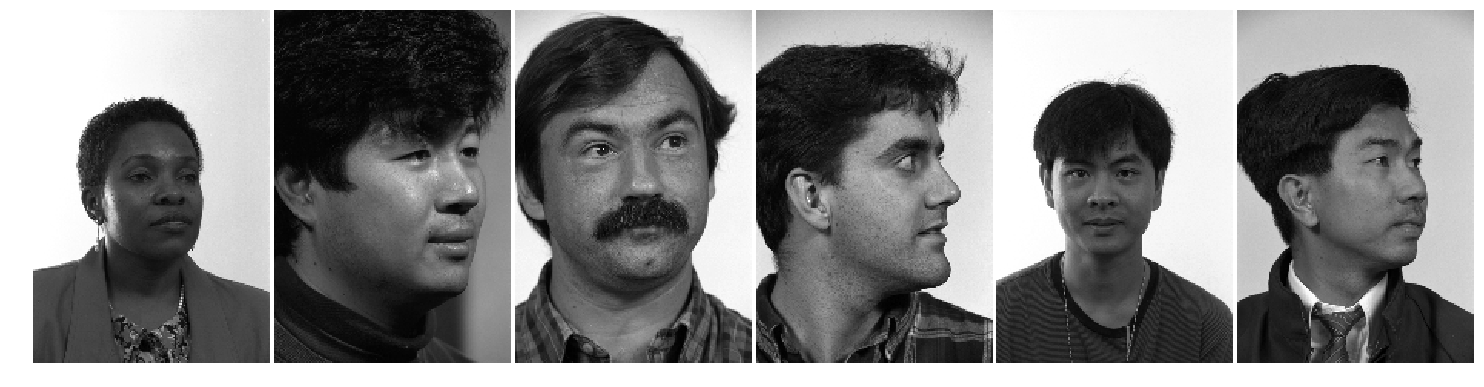

In [ ]:
data=data.mean(axis=3) #convert to gray-scale
print(data.shape)


fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 25))
plt.gray()
plt.axis("off")

for a in (ax[0], ax[1], ax[2], ax[3] ,ax[4]):
       a.axis('off')

ax[0].imshow(data[random.randint(1,len(data))])
#ax[0].set_title('Original Data')
ax[1].imshow(data[random.randint(1,len(data))])
ax[2].imshow(data[random.randint(1,len(data))])
ax[3].imshow(data[random.randint(1,len(data))])
ax[4].imshow(data[random.randint(1,len(data))])
ax[5].imshow(data[random.randint(1,len(data))])

fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)
plt.show()

In [ ]:
label=np.atleast_2d(list(map(int,label)))
print(label.shape)

ids , count_ids = np.unique(label , return_index= True )
print('\n classes are = ' , ids)

print('\n number of classes = ',len(ids))

(1, 2029)

 classes are =  [  2  29  70  93 108 146 268 383 468 469 547 556 588 594 604 630 660 704
 705 706 708 710 711 713 714 717 720 722 724 730 732 737 743 744 745 750
 751 752 760 761 763 766 768 770 771 772 773 774 789 794 809 816]

 number of classes =  52


## Split training and test set

(2029, 35420)


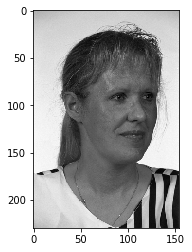

In [ ]:
ds = data.shape
data=data.reshape(ds[0],ds[1]*ds[2])
print(data.shape)

plt.imshow(data[random.randint(1,len(data))].reshape(ds[1],ds[2]))

In [ ]:
trainset=np.concatenate((data,label.T),axis=1)

testset=np.zeros((1,35421))
for Id in ids:
    index=np.array(np.where(trainset[:,35420] == Id)).flatten()
    np.random.shuffle( trainset[index]  )
    n = int (0.2 * len(index))
    testset=np.append( testset, trainset[index[0:n+1]] ,axis=0 )
    trainset=np.delete(trainset,index[0:n+1],axis=0)
testset = np.delete(testset, (0), axis=0)
    
print(trainset.shape)
print(testset.shape)

(1602, 35421)
(427, 35421)


## Finding Principal Components - Snapshot Method

Using snapshot method, eigenvectors and eigenvalues of XT X is calculated, in order to find eigenvectors of XXT .

In [ ]:
X= trainset[:,:-1].T #ignore the class labels and put each datapoint in a column
Cdash = X.T @ X
print(Cdash.shape)
mean_vec= np.atleast_2d (np.mean(X, axis=1))

val,vec= np.linalg.eig(Cdash)
vec= (X @ vec ) / val #element wise division
val_sum=np.sum(val)
index = (-val).argsort()[:50]

val=val[index]
if (np.all(val[:-1] >= val[1:])) :
    vec=vec[:,index]
    print('Principal Components are sorted!')
else:
    print ('Error: Eigenvalues are not sorted!')
    
print('\neigenvalues = ',val)

print(vec.shape , val.shape)

(1602, 1602)
Principal Components are sorted!

eigenvalues =  [1.26046188e+12 3.56837887e+10 2.89453422e+10 1.73033920e+10
 1.05099966e+10 8.01426476e+09 7.34231702e+09 4.94887883e+09
 3.84969127e+09 3.46865005e+09 2.78639455e+09 2.56271751e+09
 2.43960549e+09 2.18895574e+09 2.02734827e+09 1.81668529e+09
 1.76559378e+09 1.60723368e+09 1.52669032e+09 1.44343888e+09
 1.35139149e+09 1.20518574e+09 1.04587342e+09 9.97759057e+08
 9.31663133e+08 8.39881338e+08 8.27341878e+08 8.00205761e+08
 7.64161348e+08 7.61221729e+08 7.08613992e+08 6.78834099e+08
 6.58958779e+08 6.05764599e+08 5.78239066e+08 5.55728774e+08
 5.46810320e+08 5.22939424e+08 5.08772500e+08 4.93702405e+08
 4.85277334e+08 4.61922409e+08 4.38471442e+08 4.28506226e+08
 4.15694415e+08 4.00658551e+08 3.81431755e+08 3.74257632e+08
 3.64589121e+08 3.51329691e+08]
(35420, 50) (50,)


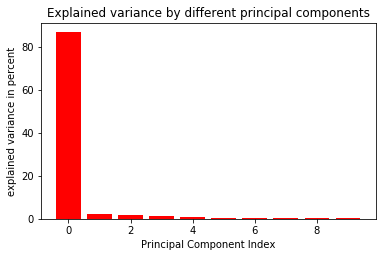

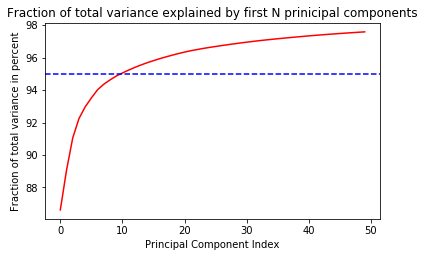

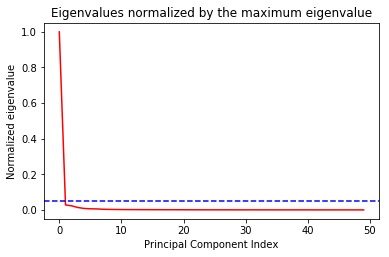



 11 prinipal components will capture 95 percent of the variance of data!


In [ ]:
plt.title('Explained variance by different principal components')
plt.xlabel('Principal Component Index')
plt.ylabel('explained variance in percent')
plt.bar(range(10), val[:10]/val_sum * 100, align='center',color='r')
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.show()

val_cum = np.cumsum(val)
plt.title('Fraction of total variance explained by first N prinicipal components')
plt.xlabel('Principal Component Index')
plt.ylabel('Fraction of total variance in percent')
plt.plot(np.arange(50), val_cum/val_sum * 100,'r-')
plt.axhline(y=95, color='b', linestyle='--')
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.show()



plt.title('Eigenvalues normalized by the maximum eigenvalue')
plt.xlabel('Principal Component Index')
plt.ylabel('Normalized eigenvalue')
plt.plot(np.arange(50), val/val[0],'r-' )
plt.axhline(y=0.05, color='b', linestyle='--')
plt.gcf().subplots_adjust(bottom=0.2) # make room for x-axis labels
plt.show()


k=np.array(np.where(val_cum > val_sum*0.95))[0,0] + 1
print ('\n\n %d prinipal components will capture 95 percent of the variance of data!' %(k))

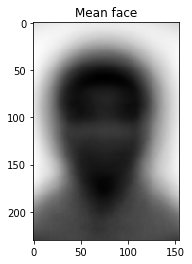

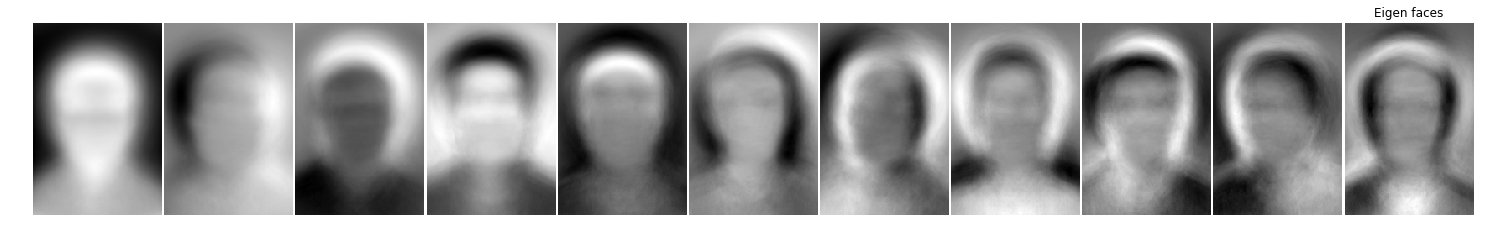

In [ ]:
plt.title('Mean face')
plt.imshow(mean_vec.reshape(ds[1],ds[2]))


fig, ax = plt.subplots(nrows=1, ncols=11, figsize=(20, 25))
plt.title('Eigen faces')
plt.gray()
plt.axis("off")

for a in (ax[0], ax[1], ax[2], ax[3] ,ax[4],ax[5],ax[6],ax[7],ax[8],ax[9],ax[10]):
       a.axis('off')

ax[0].imshow(vec[:,0].reshape(ds[1],ds[2]))
ax[1].imshow(vec[:,1].reshape(ds[1],ds[2]))
ax[2].imshow(vec[:,2].reshape(ds[1],ds[2]))
ax[3].imshow(vec[:,3].reshape(ds[1],ds[2]))
ax[4].imshow(vec[:,4].reshape(ds[1],ds[2]))
ax[5].imshow(vec[:,5].reshape(ds[1],ds[2]))
ax[6].imshow(vec[:,6].reshape(ds[1],ds[2]))
ax[7].imshow(vec[:,7].reshape(ds[1],ds[2]))
ax[8].imshow(vec[:,8].reshape(ds[1],ds[2]))
ax[9].imshow(vec[:,9].reshape(ds[1],ds[2]))
ax[10].imshow(vec[:,10].reshape(ds[1],ds[2]))


fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Project data    

In [ ]:
t_matrix= vec[:,:k]

print(t_matrix.shape)

def project(dataset, mean , t_matrix):
    dataset = dataset - np.repeat( mean , len(dataset) , axis=0)
    dataset = np.dot (dataset , t_matrix)
    return dataset

train_vec= project ( trainset[:,:-1], mean_vec , t_matrix)
print (train_vec.shape)

print(train_vec[random.randint(0,len(trainset))])

(35420, 11)
(1602, 11)
[ 4.06616259e-05  2.63183458e-03 -1.40690397e-02  2.79876142e-02
 -3.60009257e-02 -1.20187891e-02  7.58711886e-03  1.98799334e-02
 -2.99612973e-02 -8.01722036e-03  3.26568321e-02]


## Reconstruct faces

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=6, figsize=(20, 25))
plt.gray()
plt.axis("off")

for a in (ax[0], ax[1], ax[2], ax[3] ,ax[4],ax[5]):
       a.axis('off')
        
i= random.randint(0,len(train_vec))      
ax[0].imshow((np.dot (train_vec[i] , t_matrix.T) + mean_vec ).reshape(ds[1],ds[2]))
ax[1].imshow(trainset[i,:-1].reshape(ds[1],ds[2]))

i= random.randint(0,len(train_vec))
ax[2].imshow((np.dot (train_vec[i] , t_matrix.T) + mean_vec ).reshape(ds[1],ds[2]))
ax[3].imshow(trainset[i,:-1].reshape(ds[1],ds[2]))

i= random.randint(0,len(train_vec))
ax[4].imshow((np.dot (train_vec[i] , t_matrix.T) + mean_vec ).reshape(ds[1],ds[2]))
ax[5].imshow(trainset[i,:-1].reshape(ds[1],ds[2]))


fig.subplots_adjust(wspace=0.02, hspace=0.2, top=0.9, bottom=0.05, left=0, right=1)
plt.show()

## Probabilistic Face Recognition

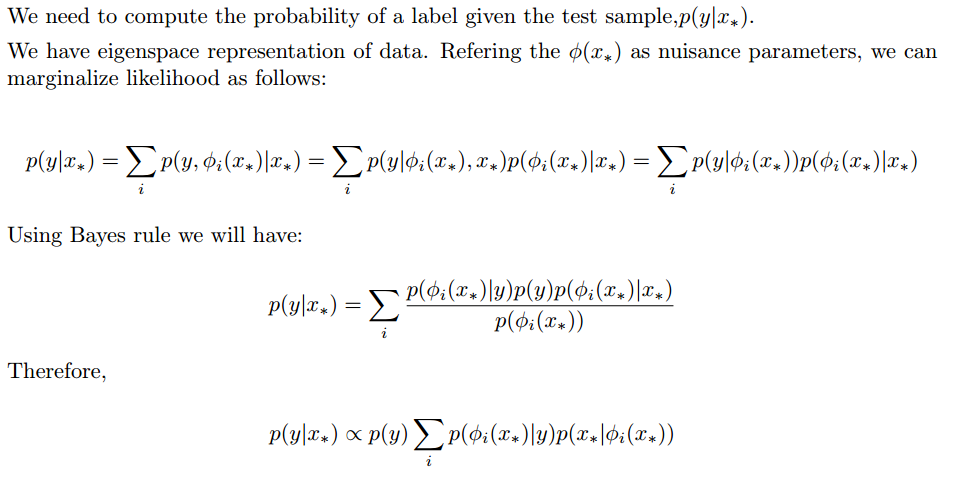

In [ ]:
import scipy.stats as stats

In [ ]:
kde=[]

for i in range(len(ids)) :
    rvs=train_vec[np.where(trainset[:,-1] == ids[i])]
    kde.append (stats.kde.gaussian_kde( rvs.T  ) )


In [ ]:
test_vec= project ( testset[:,:-1], mean_vec , t_matrix)
print (test_vec.shape)

(427, 11)


## Maximum a Posteriori

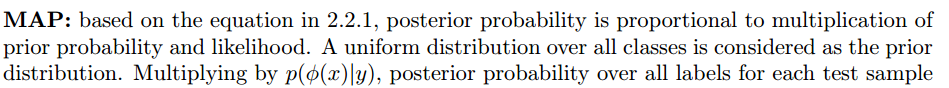

In [ ]:
## find the prior probabilities
ids1 , count_ids = np.unique(trainset[:,-1] , return_counts= True )

if( all(ids1==ids) ):
    print('Alright!')
else :
    print ('Error! You missed the order of labels')
    
prior = np.atleast_2d(count_ids / len(trainset))

print (prior , prior.shape)

Alright!
[[0.01622971 0.04494382 0.02434457 0.01622971 0.01622971 0.03308365
  0.02059925 0.01685393 0.01997503 0.01997503 0.01560549 0.01560549
  0.01935081 0.01622971 0.01622971 0.01622971 0.02184769 0.01622971
  0.02184769 0.02184769 0.02184769 0.01560549 0.02184769 0.01622971
  0.01622971 0.02184769 0.01560549 0.02184769 0.01622971 0.01622971
  0.03245943 0.01622971 0.01622971 0.02184769 0.02184769 0.01622971
  0.02184769 0.02184769 0.01622971 0.02184769 0.01622971 0.01622971
  0.01622971 0.02184769 0.01622971 0.01622971 0.01622971 0.01622971
  0.01622971 0.01622971 0.01622971 0.01622971]] (1, 52)


In [ ]:
## find the likelihood
likelihood = np.zeros( (len(testset) , len(ids) ))

for i in range (len(ids)):
    likelihood[:,i] = kde[i].evaluate(test_vec.T)
    
print ( likelihood.shape )

(427, 52)


(427, 52)


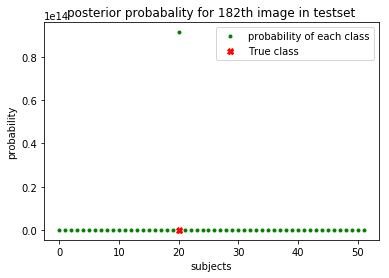

In [ ]:
## calculate the posterior
posterior =  likelihood  * np.repeat( prior , len(testset) , axis=0)
print (posterior.shape)

n=random.randint(0,len(testset))

plt.title('posterior probabality for %dth image in testset' %(n))
plt.plot(np.arange(0,len(ids)), posterior[n,:],'g.')
plt.plot(np.where(ids == testset[n,-1])[0],0,'rX')
plt.xlabel('subjects')
plt.ylabel('probability')
plt.legend(['probability of each class', 'True class'])
plt.show()

map_label = ids[np.argmax(posterior,axis=1)]

In [ ]:
## find the recognition rate

accuracy =  np.sum(map_label == testset[:,-1]) / len(testset)
print(accuracy)

0.6604215456674473


##  Nearest Neighbour

In [ ]:
dist=np.zeros((len(test_vec),len(train_vec)))

for j in range(len(test_vec)):
    for i in range (len(train_vec)):
        dist[j,i] = np.linalg.norm(train_vec[i,:]-test_vec[j,:])
    

print(dist.shape)


(427, 1602)


In [ ]:
NN_label = trainset[np.argmin(dist, axis=1),-1]
print(NN_label.shape)

accuracy =  np.sum(NN_label == testset[:,-1]) / len(testset)
print(accuracy)

(427,)
0.6370023419203747


In [ ]:
np.__version__

'1.15.4'